# 4. 모델훈련


# 4.1 선형회귀

- 일반적으로 선형 모델은 입력 특성의 가중치 합과 편향(bias)이라는 상수를 더해서 예측을 만든다.<b_r>
- $ \hat y = \theta_0 + \theta_1x_1 + ... + \theta_nx_n$ <br>
--- 
- 위 식을 벡터 형태로 더 간단하게 표현하면
    - $ \hat y = h_{\theta}(X)=\theta \circ x$<br>
    - $\theta$는 특성 가중치를 담은 모델의 파라미터 벡터<br>
    - $x$는 샘플의 특성 벡터이고, $x_0$는 항상 1이다.<br>
    

## 4.1 정규방정식  
- 비용함수를 최소화 하는 $\theta$값을 찾기위한 해석적인 방법.<br><br>
- $\hat \theta = (X^TX)^{-1}X^Ty$  
    - $\hat \theta$는 비용 함수를 최소화하는 $\theta$값이다.  
    - y는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터다.

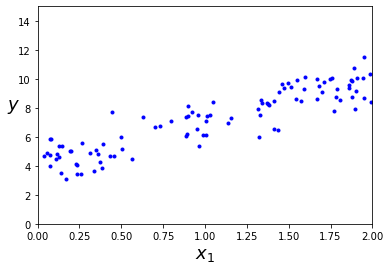

In [13]:
import matplotlib.pyplot as plt
import numpy as np

X = 2 * np.random.rand(100, 1) #0~1 균일분포의 표준정규분포 난수를 100행 1열의 열벡터로 생성
y = 4 + 3 * X + np.random.randn(100, 1) #평균0, 표준편차 1인 정규분포의 난수를 100행 1열의 열벡터로 생성
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

- 정규방정식을 활용하여 $\theta$를 계산  
    - $\hat \theta = (X^TX)^{-1}X^Ty$    

In [14]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다. 
#np_c[a, b] -> 열방향으로 합친다.([]를 하지 않는다는 것에 주의! -> np.r_[]: 안에 넘파이 배열을 넣을 때 []해줘야 함)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#np.linalg.inv는 역행렬을 계산하는 메서드이다.
#위의 계산식과 연결지어서 생각해보면 쉽다. dot은 행렬의 곱 연산을 말한다.

In [15]:
theta_best

array([[4.11526928],
       [2.94695893]])

 - $\hat y = X\hat \theta$를 사용하여 예측해보기

In [16]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.11526928],
       [10.00918714]])

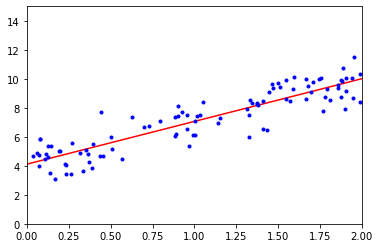

In [17]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()
#선형회귀모델의 예측

### 사이킷런을 이용하여 선형 회귀를 수행

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.11526928]), array([[2.94695893]]))

In [19]:
lin_reg.predict(X_new)

array([[ 4.11526928],
       [10.00918714]])

In [20]:
# 싸이파이 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 씁니다.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.11526928],
       [2.94695893]])

- 위 함수는 X의 유사 역행렬을 계산한다.(무어-펜로즈 역행렬)  
- np.linalg.pinv() 함수를 사용해 유사 역행렬을 직접 계산할 수 있다.

In [21]:
np.linalg.pinv(X_b).dot(y)

array([[4.11526928],
       [2.94695893]])

#### 특잇값 분해(singular value decomposition)

N×M 크기의 행렬 A를 다음과 같은 3개의 행렬의 곱으로  
나타내는 것을 특이분해(singular-decomposition) 또는 **<span style="color:blue">특잇값 분해(singular value decomposition)<span>**라고 한다.

- <span style="color:red">A=UΣVT(3.4.1)<span><br>
---  
    
여기에서 U,Σ,V는 다음 조건을 만족해야 한다.<br><br>

- 대각성분이 양수인 대각행렬이어야 한다. 큰 수부터 작은 수 순서로 배열한다.
                Σ∈RN×M
- U는 N차원 정방행렬로 모든 열벡터가 단위벡터이고 서로 직교해야 한다.

                 U∈RN×N
- V는 M차원 정방행렬로 모든 열벡터가 단위벡터이고 서로 직교해야 한다.

                 V∈RM×M 
    
위 조건을 만족하는 행렬 Σ의 대각성분들을 **특잇값(singular value)**  
행렬 U의 열벡터들을 **왼쪽 특이벡터(left singular vector)**  
행렬 V의 행벡터들을 **오른쪽 특이벡터(right singular vector)**라고 부른다.  
--- 
특이분해는 모든 행렬에 대해 가능하다. 즉 어떤 행렬이 주어지더라도 위와 같이 특이분해할 수 있다.

#### 유사역행렬을 사용하는 이유가 뭘까
- 일반 정규방정식을 계산하는 것보다 훨씬 효율적이다.  
- 어떤 특성이 중복되어 $X^TX$의 역행렬이 없다면 정규방정식을 계산할 수 없다. 하지만 유사역행렬은 항상 구할 수 있다.

## 4.1.2 계산 복잡도

- 역행렬을 계산하는 계산 복잡도가, SVD방법보다 더 크다. 즉 역행렬 계산이 더 오래걸린다.
- 특성의 수가 많아질수록 시간 차이가 명확해진다.   
- 그렇지만 메모리 공간이 허락된다면 큰 훈련 세트도 빠르게 처리가능하다.(예측이 매우 빠름)

# 4.2 경사 하강법(gradient descent)

## 4.2.1 배치 경사 하강법

 - 파라미터 $\theta_j$가 조금 변경될 때 비용함수가 얼마나 바뀌는지를 계산해야한다 => 즉, 비용함수의 편도함수를 계산<br>
     - $\theta_j$에 대한 비용함수의 미분값을 계산해야한다.<br>
--- 
※추가※<br>
- gradient vector -> 각 파라미터($\theta_1 ,,, \theta_j$)에 대한 비용함수의 편미분 값을 쌓은 벡터를 말한다.<br>
---
* 매 경사하강법 스텝에서 전체 훈련세트 X에 대해 계산하는데, 이것을 배치 경사 하강법이라고 한다.  
* 배치 경사 하강법은 특성 수에 민감하지 않아서, 정규방정식이나 SVD분해보다 선형 회귀 훈련에 용이하다.  
--- 
* 경사 하강법의 스텝
    - $\theta^{(next step)} = \theta - \eta \nabla_\theta MSE(\theta)$  
    - 아래는 이 알고리즘을 간단하게 구현한 것이다.  


In [22]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [23]:
theta #정규방정식으로 찾으 것과 동일하다. 

array([[4.11526928],
       [2.94695893]])

- 적절한 학습률을 찾기 위해 **그리드 탐색**을 사용한다.  
- 그리드 탐색에서 수렴하는데 너무 오래 걸리는 모델을 막기 위해 **반복 횟수를 제한**해야 한다.
    - 어떻게 제한?  
    => 벡터의 norm이 허용오차($\epsilon$)보다 작아지면 알고리즘을 중지하는 것이다.

## 4.2.2 확률적 경사 하강법
- 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 gradient를 계산한다!  
    - 알고리즘이 빨라지고, 매우 큰 훈련세트도 훈련시킬 수 있다.

In [24]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) #0~ m-1사이의 랜덤한 숫자 1개 뽑아내기
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients #파라미터를 업데이트     

In [25]:
theta

array([[4.11079379],
       [2.93674852]])

- SGD의 무작위성(확률성)은 local mininum에서 쉽게 탈출시켜주지만, global minimum에 다다르지 못하게 할 수 있다.  
- 그래서 시작할 때 학습률을 크게하고, 반복이 늘어날 때마다 학습률을 줄여서 알고리즘이 global minimum에 다다르게 해야한다.  
--- 
- 여기서 학습 스케쥴(learning schedule)은 학습률을 결정하는 함수를 말한다.  
---
다음은 사이킷런을 이용한 SGD이다.

In [26]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
#SGDRegressor 의 파라미터 loss의 default는 squared error이다. 
#tol -> stopping criterion을 의미한다. 즉, tol이 None이 아니라면 loss > best_loss - tol 인 경우 멈춘다. 
#eta -> 학습률의 초기값이다. default = 0.01이다
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [27]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.15245102]), array([3.00961785]))

## 4.2.3 미니배치 경사 하강법
- 미니배치라 부르는 임의의 작은 샘플 세트에 대해 gradient를 계산한다. => GPU를 사용해서 얻는 성능 향상을 도모  
- SGD보다 덜 불규칙하게 움직인다.  


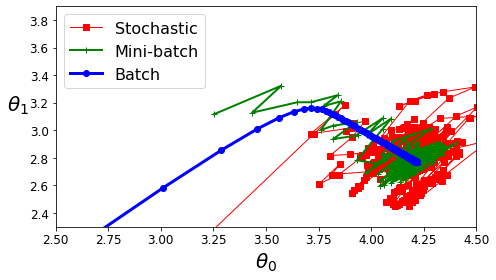

# 4.3 다항회귀
- 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련  
- 즉, 비선형 데이터를 선형 회귀 모델로 추정하는 것이다.

In [28]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3 # np.random.rand(m, 1) -> 표준정규분포 난수를 m행 1열의 열벡터로 생성
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) #2차 방정식으로 비선형 데이터 생성

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) #degree -> 차수를 조정. 여기서는 2차이므로 degree = 2
#include_bias -> 편향을 포함할지(0차 항을 포함할지)결정. 여기서 False이므로 편향은 없음.
X_poly = poly_features.fit_transform(X) #fit_transform하여 새로운 특성을 생성
X[0]

array([-0.75275929])

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

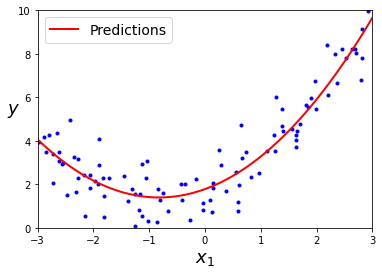

In [31]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

- 특성이 여러개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있다.  
- PolynomialFeatures(degree = d)일 때, 특성이 n개인 배열을 특성이 $(n+d)! \over d!n!$개인 배열로 변환한다.

# 4.4 학습곡선

- 어떤 함수로 데이터가 형성되어있는지 모를 때, 얼마나 고차 다항 회귀를 사용해야 하는지 알 수 있을까?  
    - 또는 어떻게 과대적합, 과소적합을 판단할 수 있을까?  
    - 교차검증과 학습곡선 이용.
--- 
**학습곡선**을 이용해야한다.  
- 이 곡선은 훈련세트와 검증세트의 모델 성능을 훈련세트의 크기(또는 훈련 반복 횟수)의 함수로 나타낸다.  
    - 즉, x축이 훈련세트의 크기(또는 훈련 반복 횟수)이고 y축이 모델 성능

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 범례를 추가(plt.legend)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14) 

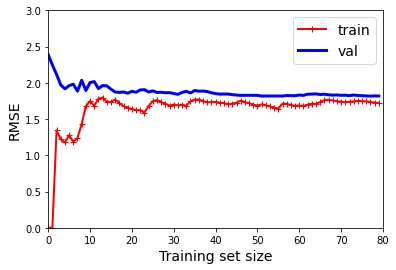

In [37]:
lin_reg = LinearRegression() #선형회귀의 학습곡선 확인
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                 #x축, y축의 범위 설정
plt.show()   

- 과소적합 모델의 전형적인 모습이다.
    - 훈련 데이터에 비선형 데이터가 합쳐지면서, 데이터를 완벽히 학습하지 못한다.  
    - 검증에 대해서도 선형 회귀 모델이 주어진 데이터를 잘 모델링 하지 못하여 오차의 감소가 완만해진다.  

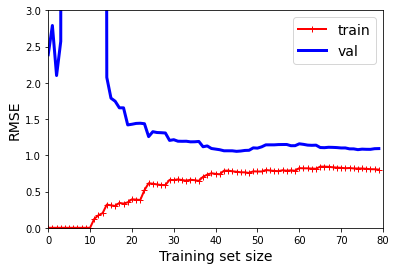

In [38]:
#10차 다항회귀 모델의 학습곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           #x, y축의 범위 설정
plt.show()        

**이전 학습 곡선과의 차이점**  
- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.  
- 두 곡선 사이의 공간이 존재. -> 훈련 데이터에서의 모델 성능이 훨씬 좋은데 이는 과대적합 모델의 특징이다.

# 4.5 규제가 있는 선형 모델

- 과대적합을 해결하는 대표적인 방법: 규제(regularization) 
    - **다항 회귀 모델**에서는 *다항식의 차수를 줄이는 것*이 규제.  
    - **선형 회귀 모델**에서는 *모델의 가중치를 제한하는 것*이 규제.  
        - **릿지, 라쏘, 엘라스틱넷**

## 4.5.1 릿지 회귀(또는 티호노프 규제)
 **규제항은 훈련하는 동안에만 비용 함수에 추가**<br><br>
- 규제항 $\alpha \sum_{i=1}^n \theta_i^2$를 비용함수에 추가한다.  
    - $\theta_0$인 편향은 규제되지 않는다는 점!  
    - 실제로 비용함수에 더해질 때는 $1 \over 2$가 곱해지는데 이것은 미분 결과를 간단하게 만들기 위해서이다.
    - 릿지 회귀는 데이터 스케일에 민감하므로, 수행 전 데이터 스케일을 맞춰야 한다.<br><br>

---
- $\alpha$는 하이퍼파라미터로서 모델을 얼마나 많이 규제할지 조절  
    - $\alpha$ = 0 이면 릿지 회귀는 선형 회귀와 같아진다.

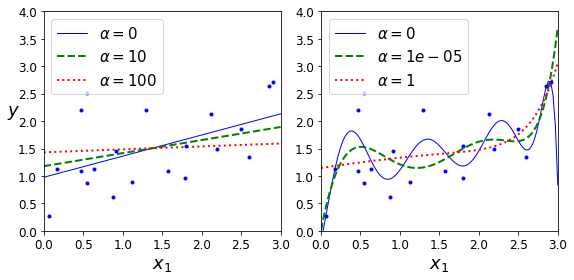

- 왼쪽은 평범한 릿지 모델을 사용하여 선형적 예측.  
- 오른쪽은 고차 다항 회귀(10차)를 사용하여 데이터 확장 후 데이터 스케일을 조정하여 릿지 회귀를 적용.
---
릿지 회귀를 계산하기 위해 정규방정식을 이용하거나 SGD를 이용할 수 있다. 

In [41]:
#사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82497007]])

In [42]:
#사이킷런에서 확률적 경사하강법을 사용한 릿지 회귀를 적용
sdg_reg = SGDRegressor(penalty = "l2")
#penalty 파라미터를 이용해 사용할 규제를 지정(l2 => 가중치 벡터의 l2 norm 제곱을 2로 나눈 규제항 추가) = 릿지회귀
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

C:\Users\Minki\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([4.95896976])

## 4.5.2 라쏘 회귀
- 비용 함수에 규제항 $\alpha \sum_{i=1}^n |\theta_i|$를 추가한다.  
    - 릿지와 다르게 가중치 벡터의 l1 norm을 사용!
--- 
**중요한 특징**  
 - 덜 중요한 특성의 가중치를 제거하려고 한다. 
 - 자동으로 특성 선택을 하고 희소 모델을 만든다.(0이 아닌 특성의 가중치가 적다)  
 - 라쏘의 비용함수는 가중치가 0일때 미분 불가 => subgradient vector($g$)를 사용하여 경사하강법을 적용해야 한다. 

In [43]:
#사이킷런을 이용한 Lasso 클래스 적용
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])
#Lasso 클래스 대신에 SGDRegressor(penalty = "l1")을 이용할 수 있다.

array([4.77621741])

## 4.5.3 엘라스틱넷
- 리짓과 라쏘를 혼합
- 규제항: $r\alpha \sum_{i=1}^n |\theta_i| + {1-r \over 2}\alpha \sum_{i=1}^n \theta_i^2$  
    - $r = 0$이면 릿지 회귀와 같고, $r = 1$이면 라쏘 회귀와 같다.

In [44]:
#사이킷런의 ElasticNet을 사용한 예제
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

## 4.5.4 조기종료
- 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것이다.  
    - 줄어들었던 에러가 다시 늘어난다? -> 과대적합이 시작된다  
    - 늘어나기 전 최솟값에서 멈춰버려  

In [46]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

from copy import deepcopy #깊은 복사를 말한다. 
#deepcopy -> 새로운 복합 객체를 만들고,재귀적으로 원본 객체의 사본을 새로 만든 복합 객체에 삽입.
#모든것을 복사하기 때문에 시간이 오래걸릴 수 있다. 
#깊은 복사는 list, set, dictionary와 같은 mutable 한 객체에만 적용하는게 좋다.
#완전 다른 메모리를 할당하기 때문에, 원본을 유지함과 동시에 참조가 변할 일이 없다. 


poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), #다항 선형 회귀, 편향은 포함하지 않는다.
        ("std_scaler", StandardScaler()) #데이터의 스케일을 맞춰준다.
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train) #poly_scaler 파이프라인을 통과한, 새롭게 스케일 된 훈련 데이터
X_val_poly_scaled = poly_scaler.transform(X_val) #새롭게 스케일된 검증 데이터

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42) #규제가 없음, 초기 학습률 = 0.0005
#warm_start는 불리안 값을 받는다. True -> 초깃갑 설정을 위해 이전 solution을 이용한다.

minimum_val_error = float("inf") #양의 무한대
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 훈련을 이어서 진행한다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict) #MSE를 이용.
    if val_error < minimum_val_error: #이 부분은 잘 이해가 안감,,?
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg) #깊은 복사로 best model을 생성

# 4.6 로지스틱 회귀
- 로지스틱 회귀는 샘플이 특정 클래스에 속할 확률을 추정  
    - 레이블이 1인 양성 클래스와 레이블이 0인 음성 클래스.(이항 분류)

## 4.6.1 확률 추정
- 로지스틱은 0과 1사이의 값을 출력하는 시그모이드 함수(S자 형태)
    - $\sigma(t) = {1 \over 1+exp(-t)}$

## 4.6.2 훈련과 비용 함수

## 4.6.3 결정 경계

In [47]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [48]:
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0

In [49]:
#로지스틱 회귀 모델을 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
#solver 파라미터는 어떤 optimizer를 사용할 것인가에 대한 파라미터이다.
#어떤 solver를 선택할지는 데이터셋과, 규제항을 고려해야한다. 
log_reg.fit(X, y)

LogisticRegression(random_state=42)

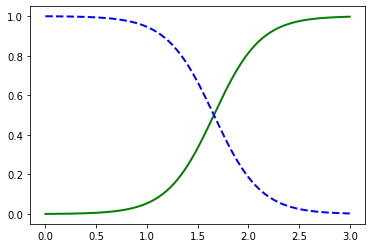

In [50]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) #reshape -> 2번째 차원을 1로 하고 나머지는 알아서. 즉 열벡터가 된다. 
#np.linspace(start, stop, num, endpoint, repstep) -> start는 시작점, stop은 끝, num은 갯수. num의 default = 50이다. 
    # endpoint는 불리안 값을 받으며 마지막 stop을 포함할지 여부를 결정한다.(defualt = True)
    # repstep은 불리안 값을 받으며 수열의 간격을 출력한다(default = False)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [51]:
log_reg.predict([[1.7], [1.5]])
#로지스틱 회귀 모델도 페널티 적용 가능(l1, l2)

array([1, 0])

## 4.6.4 소프트맥스 회귀
- 다항 로지스틱 회귀라고도 한다.  
- 각 클래스는 자신만의 파라미터 벡터가 있고, 이 벡터들을 파라미터 행렬에 행으로 저장한다.  
- 각 클랫의 점수를 소프트맥스 함수에 통과시켜 클래스에 속할 확률을 추정한다.   
---   
**주의**  
    - 소프트맥스 회귀 분류기는 한번에 하나의 클래스만 예측한다. -> 다중 클래스지 다중 출력이 아님!  <br>
    - 그래서 상호 배타적인 클래스에서만 사용해야 한다.

In [52]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
#mult_class 매개변수를 "multinominal"로 바꾸면 소프트맥스 회귀 사용 가능.
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [53]:
softmax_reg.predict([[5, 2]])

array([2])

In [54]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])